In [46]:
import os
import glob
import pandas as pd
import numpy as np
cd=os.getcwd()
os.chdir(r'C:\Users\Fridmann\Desktop')
for file in glob.glob("GaSedat.txt"):
    df = pd.read_csv(file, sep='\t', skiprows=1, delimiter=';', names = [ 'corr','step'])

In [47]:
df.head(5)

,corr,step
0,10.95880,0
1,11.00030,1
2,8.80094,2
3,6.84937,3
4,4.78557,4


In [48]:
df.set_index('step', inplace=True)

# translate index name into English
df.index.name = 'step'

# calculate the yearly average air temperature
df['average_Gr'] = df.mean(axis=1)

# drop columns containing monthly values
df = df[['average_Gr']]

# visualize the first 5 columns
df.head()

,average_Gr
step,
0,10.95880
1,11.00030
2,8.80094
3,6.84937
4,4.78557


In [49]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')
seaborn.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1,
color_codes=False)

# line plot - the yearly average air temperature in Barcelona
df.plot(color='green', linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('Def stat', fontsize=20)
plt.xlabel('Step', fontsize=16)
plt.ylabel('G(r)', fontsize=16)#Defects [°C]

NameError: name 'seaborn' is not defined

In [50]:
df['SMA_10'] = df.average_Gr.rolling(5, min_periods=1).mean()
# df['SMA_20'] = df.average_Gr.rolling(10, min_periods=1).mean()

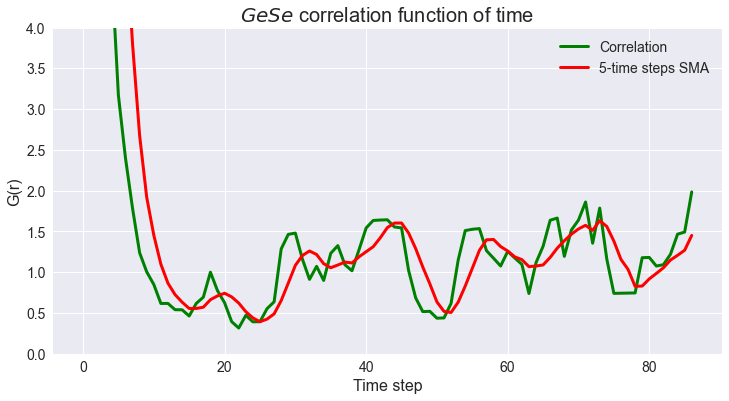

In [52]:
# colors for the line plot
# colors = ['green', 'red', 'purple']
colors = ['green', 'red']
# line plot - the yearly average air temperature in Barcelona
df.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Correlation', '5-time steps SMA'], fontsize=14)
# plt.legend(labels =['Average air temperature', '5-time steps SMA', '20-years SMA'], fontsize=14)

# title and labels
plt.title('$GeSe$ correlation function of time', fontsize=20)
plt.ylim([0,4])

plt.xlabel('Time step', fontsize=16)
plt.ylabel('G(r)', fontsize=16)
plt.savefig(r'C:\Users\Fridmann\Desktop\GeSecor.png')

<Figure size 432x288 with 0 Axes>

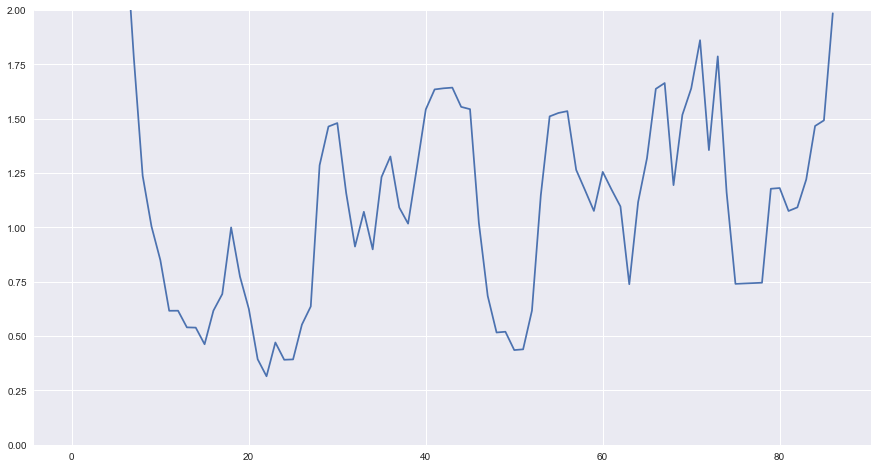

<Figure size 432x288 with 0 Axes>

In [39]:

%matplotlib inline
plt.figure(figsize=(15,8))
plt.plot(df['step'],df['corr'])
plt.ylim([0,2])
plt.figure()